In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [2]:
# GELU approximation used for GPT2

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
         ))

In [3]:
gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

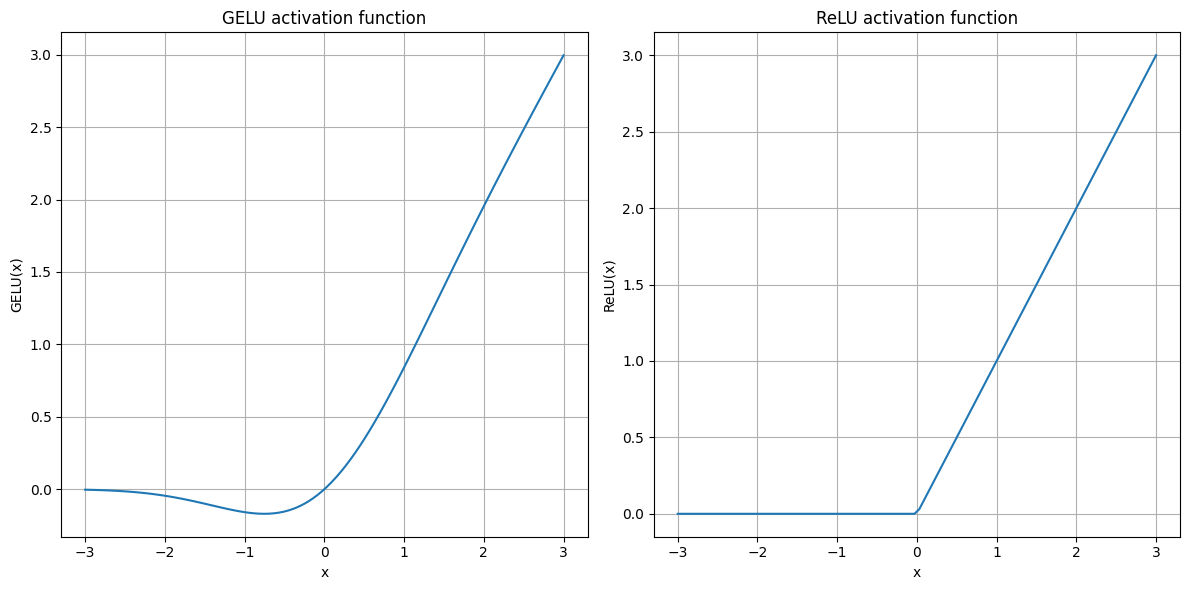

In [4]:
plt.figure(figsize=(12, 6))

for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

<p>GELU is a smooth, nonlinear function that approximates ReLU but with a non-zero gradient for negative values.
<p>vs
<p>ReLU is a piecewise linear function: output == input directly, if it is positive; output == zero, otherwise. 

<p>GELU avoids overfitting, as it is able to work better with negative-valued neurons.
<p>vs
<p>ReLU is simpler to compute.

<p>GELU is smoother near zero and is differentiable in all ranges, incl. in 0.
<p>vs
<p>ReLU is not differentiable in 0.